In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
HEADERS = {
    "User-Agent":'Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/59.0.3071.115 Safari/537.36'
}

# Scrape Images

In [58]:
import requests
from bs4 import BeautifulSoup
import os 

url = "https://archive.vogue.com/issue/20211101"
r = requests.get(url)

soup = BeautifulSoup(r.text, 'html.parser')


images = soup.find('img', class_='bndwgt__issuecover_main')

print(images)

<img alt="Issue: - NOVEMBER 2021 | Vogue" class="bndwgt__issuecover_main" src="https://vogueprod.blob.core.windows.net/vogueoutput20211101thumbnails/Covers/0x600/20211101.jpg"/>


# Save images

In [59]:
import os 
import datetime 
import requests 
from PIL import Image 
from io import BytesIO

# Define the base URL of the website 
# "https://vogueprod.blob.core.windows.net/vogueoutput20231201thumbnails/Covers/0x600/20231201.jpg" 
base_url = "https://vogueprod.blob.core.windows.net/vogueoutput{date}thumbnails/Covers/0x600/{date}.jpg" 

# Define the starting and end years we want to use 
start_year = 2000
end_year = 2023

# create a directory to save the changes 
output_directory = "all_pics/scraped/vogue"
os.makedirs(output_directory, exist_ok=True)

# Loop over every year 
for year in range (start_year, end_year+1):
    for month in range(1,13):
        # create a datetime object for the first day of the month 
        first_day_of_month = datetime.date(year, month,1)
        
        # format the date as YYMM01
        formatted_date = first_day_of_month.strftime("%Y%m01") #strftime converts as datetime object into string
        
        # construct the image URL 
        image_url = base_url.format(date=formatted_date)
        
        # get the image data
        response = requests.get(image_url)
        if response.status_code == 200:
            # open the image using PIL 
            image = Image.open(BytesIO(response.content))
            
            # Define the file path to save the image 
            file_path = os.path.join(output_directory, f"vogue{formatted_date}.jpg")
            
            # Save the image as JPG file 
            image.save(file_path)
            
            # Close the image 
            image.close()
            
            # print a message that the images have been saved 
            print(f"Saved:vogue{formatted_date}")
            
            # print an error message
        else:
            print(f"Error in saving: vogue{formatted_date}: {response.status_code}")

Saved:vogue20000101
Saved:vogue20000201
Saved:vogue20000301
Saved:vogue20000401
Saved:vogue20000501
Saved:vogue20000601
Saved:vogue20000701
Saved:vogue20000801
Saved:vogue20000901
Saved:vogue20001001
Saved:vogue20001101
Saved:vogue20001201
Saved:vogue20010101
Saved:vogue20010201
Saved:vogue20010301
Saved:vogue20010401
Saved:vogue20010501
Saved:vogue20010601
Saved:vogue20010701
Saved:vogue20010801
Saved:vogue20010901
Saved:vogue20011001
Saved:vogue20011101
Saved:vogue20011201
Saved:vogue20020101
Saved:vogue20020201
Saved:vogue20020301
Saved:vogue20020401
Saved:vogue20020501
Saved:vogue20020601
Saved:vogue20020701
Saved:vogue20020801
Saved:vogue20020901
Saved:vogue20021001
Saved:vogue20021101
Saved:vogue20021201
Saved:vogue20030101
Saved:vogue20030201
Saved:vogue20030301
Saved:vogue20030401
Saved:vogue20030501
Saved:vogue20030601
Saved:vogue20030701
Saved:vogue20030801
Saved:vogue20030901
Saved:vogue20031001
Saved:vogue20031101
Saved:vogue20031201
Saved:vogue20040101
Saved:vogue20040201


In [60]:
import numpy as np
import cv2
import os

# Detect Faces from images

In [64]:
def detect_faces(image, cascade_path="haarcascade_frontalface_default.xml"):
    face_cascade = cv2.CascadeClassifier(cascade_path)
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(
            grayscale_image,
            scaleFactor=1.1,
            minNeighbors=5)
    return faces

def get_faces_in_image(image_path, company, image_number):
    image = cv2.imread(image_path)
    print(image_path)
    faces = detect_faces(image)
    face_number = 0
    for (x, y, width, height) in faces:
        cropped = image[y:y + height, x:x + width]
        file_name = "all_pics/cropped_faces/{0}/{1}{2:08d}_{3}.jpg".format(company, company, image_number, face_number)
        cv2.imwrite(file_name, cropped)
        face_number += 1
    
    # were there any faces found?
    return (face_number != 0)
    
def get_all_faces(company):
    directory = "all_pics/scraped/{}".format(company)
    output_directory = "all_pics/cropped_faces/{}".format(company)
    os.makedirs(output_directory, exist_ok=True)  # Added error handling for directory creation
    image_number = 0
    for image in os.listdir(directory):
        image_path = "{}/{}".format(directory, image)
        found_faces = get_faces_in_image(image_path, company, image_number)
        if (found_faces):
            image_number += 1
    return image_number



In [65]:
faces = get_all_faces("vogue")
print("Found {} faces in Vogue covers".format(faces))

all_pics/scraped/vogue/vogue20080201.jpg
all_pics/scraped/vogue/vogue20000401.jpg
all_pics/scraped/vogue/vogue20180201.jpg
all_pics/scraped/vogue/vogue20100401.jpg
all_pics/scraped/vogue/vogue20030501.jpg
all_pics/scraped/vogue/vogue20130501.jpg
all_pics/scraped/vogue/vogue20060901.jpg
all_pics/scraped/vogue/vogue20160901.jpg
all_pics/scraped/vogue/vogue20050801.jpg
all_pics/scraped/vogue/vogue20150801.jpg
all_pics/scraped/vogue/vogue20120101.jpg
all_pics/scraped/vogue/vogue20020101.jpg
all_pics/scraped/vogue/vogue20190601.jpg
all_pics/scraped/vogue/vogue20090601.jpg
all_pics/scraped/vogue/vogue20061001.jpg
all_pics/scraped/vogue/vogue20161001.jpg
all_pics/scraped/vogue/vogue20051101.jpg
all_pics/scraped/vogue/vogue20151101.jpg
all_pics/scraped/vogue/vogue20201201.jpg
all_pics/scraped/vogue/vogue20061201.jpg
all_pics/scraped/vogue/vogue20161201.jpg
all_pics/scraped/vogue/vogue20231101.jpg
all_pics/scraped/vogue/vogue20201001.jpg
all_pics/scraped/vogue/vogue20110201.jpg
all_pics/scraped

all_pics/scraped/vogue/vogue20050701.jpg
all_pics/scraped/vogue/vogue20160601.jpg
all_pics/scraped/vogue/vogue20060601.jpg
all_pics/scraped/vogue/vogue20230501.jpg
all_pics/scraped/vogue/vogue20200401.jpg
all_pics/scraped/vogue/vogue20091001.jpg
all_pics/scraped/vogue/vogue20191001.jpg
all_pics/scraped/vogue/vogue20070201.jpg
all_pics/scraped/vogue/vogue20170201.jpg
all_pics/scraped/vogue/vogue20040301.jpg
all_pics/scraped/vogue/vogue20140301.jpg
all_pics/scraped/vogue/vogue20220101.jpg
all_pics/scraped/vogue/vogue20090901.jpg
all_pics/scraped/vogue/vogue20190901.jpg
all_pics/scraped/vogue/vogue20101201.jpg
all_pics/scraped/vogue/vogue20001201.jpg
all_pics/scraped/vogue/vogue20160101.jpg
all_pics/scraped/vogue/vogue20060101.jpg
all_pics/scraped/vogue/vogue20230201.jpg
all_pics/scraped/vogue/vogue20200301.jpg
all_pics/scraped/vogue/vogue20011101.jpg
all_pics/scraped/vogue/vogue20111101.jpg
all_pics/scraped/vogue/vogue20021001.jpg
all_pics/scraped/vogue/vogue20121001.jpg
all_pics/scraped

In [73]:
def rename(company):
    # Define the directories
    input_directory = "all_pics/cropped_faces/{}".format(company)
    output_directory = "all_pics/cropped_faces_renamed/{}".format(company)

    # Create the output directory if it doesn't exist
    os.makedirs(output_directory, exist_ok=True)

    count = 0
    for image in os.listdir(input_directory):
        # Define the file paths
        input_image_path = os.path.join(input_directory, image)
        
        # Skip non-image files
        if not image.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
            print("Skipping non-image file:", input_image_path)
            continue

        # Define the output file path
        output_image_path = os.path.join(output_directory, "{}{:08d}.jpg".format(company, count))

        # Read the image
        image_data = cv2.imread(input_image_path)
        
        # Check if the image data is valid
        if image_data is not None:
            # Write the image to the output directory with the new name
            cv2.imwrite(output_image_path, image_data)
            count += 1
        else:
            print("Error: Unable to read image:", input_image_path)





In [74]:
rename("vogue")

Skipping non-image file: all_pics/cropped_faces/vogue/.DS_Store
Skipping non-image file: all_pics/cropped_faces/vogue/.ipynb_checkpoints


In [75]:
def take_average(image):
    average_row_color = np.average(image, axis=0)
    average_color = np.average(average_row_color, axis=0)
    color_block = np.zeros((100, 100, 3), dtype=np.uint8)
    color_block[:, :] = average_color
    return color_block  

def get_average_colors(company):
    directory = "all_pics/cropped_faces_renamed/{}".format(company)
    for image in os.listdir(directory):
        image_path = "{}/{}".format(directory, image)
        face = cv2.imread(image_path)
        average_color = take_average(face)
        file_name = "all_pics/average_color/{}/{}".format(company, image)
        cv2.imwrite(file_name, average_color)

In [76]:
get_average_colors("vogue")

# Identify skin and calculate skin color (one image)

In [77]:
from sklearn.cluster import KMeans
from collections import Counter

def cluster_face(image, white_threshold):
    
    # save a patch of pixels from the center of the pic to identify the skin label
    (height, width, three) = image.shape
    (center_x, center_y) = (width // 2, height // 2)
    patch = image[center_x - 10 : center_x + 10, center_y - 10 : center_y + 10]
    flattened_patch = patch.transpose(2, 0, 1). reshape(3, -1).transpose()
    
    # remove white pixels, and fit a classifier
    flattened = image.transpose(2, 0, 1).reshape(3, -1).transpose()
    filtered = np.array([pixel for pixel in flattened if pixel.sum() < white_threshold])
    k_means = KMeans(n_clusters=2)
    k_means.fit(filtered)
    
    # identify the skin label
    patch_labels = k_means.predict(flattened_patch)
    skin_label = Counter(patch_labels).most_common()[0][0]
    
    # save the average skin pixel
    all_labels = k_means.predict(filtered)
    skin_mask = (all_labels == skin_label)
    skin_pixels = filtered[skin_mask]
    average_color = np.average(skin_pixels, axis=0)
    return average_color

In [91]:
# Load the image using OpenCV
image_path = "all_pics/cropped_faces_renamed/vogue/vogue00000015.jpg"  # Replace this with the path to your image file
image = cv2.imread(image_path)

# Set the white threshold (you may need to adjust this value)
white_threshold = 1000

# Call the cluster_face function
average_color = cluster_face(image, white_threshold)

print("Average skin color:", average_color)

Average skin color: [152.66268408 171.44493841 208.82263592]


/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


1. parse cluster face for every image. 
2. store B,G,R values as csv file 

In [92]:
# find skin color of all faces and store skin color values as a dictionary/list
def all_cluster_face(folder_path, white_threshold):
    skin_colors = []
    for image_file in os.listdir(folder_path):
        if image_file.endswith(".jpg") or image_file.endswith(".jpeg") or image_file.endswith(".png"):
            image_path = os.path.join(folder_path, image_file)
            image = cv2.imread(image_path)
            if image is not None:
                average_color = cluster_face(image, white_threshold)
                skin_colors.append(average_color)
            else:
                print("Error loading image:", image_path)
    return skin_colors

In [93]:
folder_path = "all_pics/cropped_faces_renamed/vogue"
white_threshold = 1000
skin_colors = all_cluster_face(folder_path, white_threshold)
print("Average skin colors for all images:", skin_colors)

/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

Average skin colors for all images: [array([ 49.1204461 ,  59.84386617, 100.64423792]), array([134.89118065, 165.20412518, 205.73186344]), array([124.4891415 , 136.41245334, 210.96284357]), array([154.02395833, 178.42152778, 209.73923611]), array([136.65207763, 153.60192784, 179.71460206]), array([181.72200498, 196.85860292, 224.4161038 ]), array([136.32877219, 159.64607988, 182.04049556]), array([29.23148148, 34.3252818 , 53.61835749]), array([110.32700848, 131.82276948, 182.89220832]), array([114.62725137, 133.50939702, 184.45458105]), array([155.70056688, 160.47320826, 173.75246322]), array([169.16653258, 179.77366586, 201.63958166]), array([ 64.29997995,  62.40765992, 106.79496691]), array([153.53109664, 167.56875236, 191.86872405]), array([170.27759563, 181.02431694, 209.75655738]), array([147.83565279, 168.15619134, 227.70101625]), array([151.78967136, 175.27824726, 218.92425665]), array([149.95291709, 170.32105084, 198.11702491]), array([ 67.21601017, 108.86531131, 153.62770013]

/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# Identify skin and calculate skin color for all images

In [98]:
import csv       
             
def all_cluster_face(folder_path, company_name, white_threshold, output_csv):
    skin_colors = []
    for image_file in os.listdir(folder_path):
        if image_file.endswith(".jpg") or image_file.endswith(".jpeg") or image_file.endswith(".png"):
            image_path = os.path.join(folder_path, image_file)
            image = cv2.imread(image_path)
            if image is not None:
                average_color = cluster_face(image, white_threshold)
                skin_colors.append((image_file, company_name, *average_color))
            else:
                print("Error loading image:", image_path)
    
    # Save skin color values to a CSV file
    with open(output_csv, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Image Name', 'Company Name', 'Blue', 'Green', 'Red'])
        writer.writerows(skin_colors)

In [99]:
# Example usage:
folder_path = "all_pics/cropped_faces_renamed/vogue"
company_name = 'vogue'
white_threshold = 1000
output_csv = "skin_colors.csv"
all_cluster_face(folder_path, company_name, white_threshold, output_csv)

/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/suhyun/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

In [78]:
import pandas as pd
import colorsys

In [107]:
color_values = pd.read_csv("skin_colors.csv")
color_values.rename(columns={'Image Name': 'Image', 'Company Name': 'Company', 'Blue': 'b', 'Green': 'g', 'Red': 'r'}, inplace=True)
color_values.head()

,Image,Company,b,g,r
0,vogue00000098.jpg,vogue,49.120446,59.843866,100.644238
1,vogue00000073.jpg,vogue,134.891181,165.204125,205.731863
2,vogue00000067.jpg,vogue,124.489141,136.412453,210.962844
3,vogue00000259.jpg,vogue,154.023958,178.421528,209.739236
4,vogue00000271.jpg,vogue,136.647174,153.593514,179.708778


In [109]:
# display int types 
display(color_values.dtypes)

# change floats to int
color_values['b'] = color_values['b'].astype(int)
color_values['g'] = color_values['g'].astype(int)
color_values['r'] = color_values['r'].astype(int)

display(color_values.dtypes)
color_values.head()

Image       object
Company     object
b          float64
g          float64
r          float64
dtype: object

Image      object
Company    object
b           int64
g           int64
r           int64
dtype: object

,Image,Company,b,g,r
0,vogue00000098.jpg,vogue,49,59,100
1,vogue00000073.jpg,vogue,134,165,205
2,vogue00000067.jpg,vogue,124,136,210
3,vogue00000259.jpg,vogue,154,178,209
4,vogue00000271.jpg,vogue,136,153,179


# Use H, S, L values to determine skin tone

In [125]:
h_col = []
l_col = []
s_col = []

for index, row in color_values.iterrows():
    r = row["r"] / 255
    g = row["g"] / 255
    b = row["b"] / 255
    (h, l, s) = colorsys.rgb_to_hls(r, g, b)
    h_col.append(h)
    l_col.append(l)
    s_col.append(s)
    
color_values["h"] = h_col
color_values["l"] = l_col
color_values["s"] = s_col

color_values = color_values.sort_values(by=["l"])
color_values.head()

,Image,Company,b,g,r,h,l,s
7,vogue00000113.jpg,vogue,29,34,53,0.034722,0.160784,0.292683
222,vogue00000086.jpg,vogue,31,35,57,0.025641,0.172549,0.295455
182,vogue00000036.jpg,vogue,38,34,71,0.981982,0.205882,0.352381
216,vogue00000251.jpg,vogue,35,49,73,0.061404,0.211765,0.351852
189,vogue00000183.jpg,vogue,32,52,77,0.074074,0.213725,0.412844


In [127]:
color_values.tail(5) 

,Image,Company,b,g,r,h,l,s
160,vogue00000190.jpg,vogue,188,201,226,0.057018,0.811765,0.395833
196,vogue00000141.jpg,vogue,184,205,233,0.071429,0.817647,0.526882
125,vogue00000028.jpg,vogue,185,204,233,0.065972,0.819608,0.521739
261,vogue00000069.jpg,vogue,192,201,233,0.036585,0.833333,0.482353
197,vogue00000196.jpg,vogue,206,210,227,0.031746,0.849020,0.272727


In [126]:
color_values.groupby('l')
color_values.head()

,Image,Company,b,g,r,h,l,s
7,vogue00000113.jpg,vogue,29,34,53,0.034722,0.160784,0.292683
222,vogue00000086.jpg,vogue,31,35,57,0.025641,0.172549,0.295455
182,vogue00000036.jpg,vogue,38,34,71,0.981982,0.205882,0.352381
216,vogue00000251.jpg,vogue,35,49,73,0.061404,0.211765,0.351852
189,vogue00000183.jpg,vogue,32,52,77,0.074074,0.213725,0.412844


In [122]:
# Define custom bins for lightness values
bins = np.arange(0.2, 1.0, 0.05)

color_values.groupby(pd.cut(color_values['l'], bins=bins))
color_values.head()

,Image,Company,b,g,r,h,l,s
7,vogue00000113.jpg,vogue,29,34,53,0.631944,0.160784,0.292683
222,vogue00000086.jpg,vogue,31,35,57,0.641026,0.172549,0.295455
182,vogue00000036.jpg,vogue,38,34,71,0.684685,0.205882,0.352381
216,vogue00000251.jpg,vogue,35,49,73,0.605263,0.211765,0.351852
189,vogue00000183.jpg,vogue,32,52,77,0.592593,0.213725,0.412844


# Visualizations

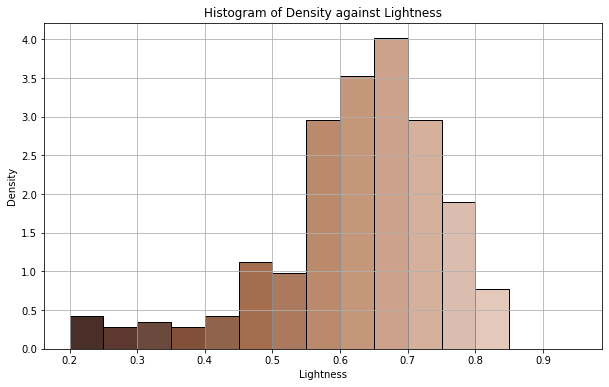

In [133]:
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex

########################

# Define custom bins for lightness values
bins = np.arange(0.2, 1.0, 0.05)

# Group by lightness and calculate average BGR values
average_bgr = color_values.groupby(pd.cut(color_values['l'], bins=bins))[['b', 'g', 'r']].mean()

# Calculate the density of data points in each bin
lightness_counts, _ = np.histogram(color_values['l'], bins=bins)
bin_widths = bins[1:] - bins[:-1]
density = lightness_counts / np.sum(lightness_counts * bin_widths)

# Plot histogram for density against lightness
plt.figure(figsize=(10, 6))
for i, (index, row) in enumerate(average_bgr.iterrows()):
    rgb_color = row.values[::-1] / 255.0  # Reverse BGR to RGB and normalize to [0, 1]
    rgb_color = np.nan_to_num(rgb_color) 
    hex_color = rgb2hex(rgb_color)  # Convert RGB to hex color
    plt.bar(index.mid, density[i], width=index.length, color=hex_color, edgecolor='black')

plt.xlabel('Lightness')
plt.ylabel('Density')
plt.title('Histogram of Density against Lightness')
plt.grid(True)
plt.show()

/var/folders/tl/pjvv24r97gb_70lb57b6jp680000gn/T/ipykernel_9395/1924195903.py:8: UserWarning: Attempting to set identical left == right == -0.5 results in singular transformations; automatically expanding.
  plt.imshow([[color[::-1] for color in colors]], aspect='auto')  # Reverse back to BGR for plotting


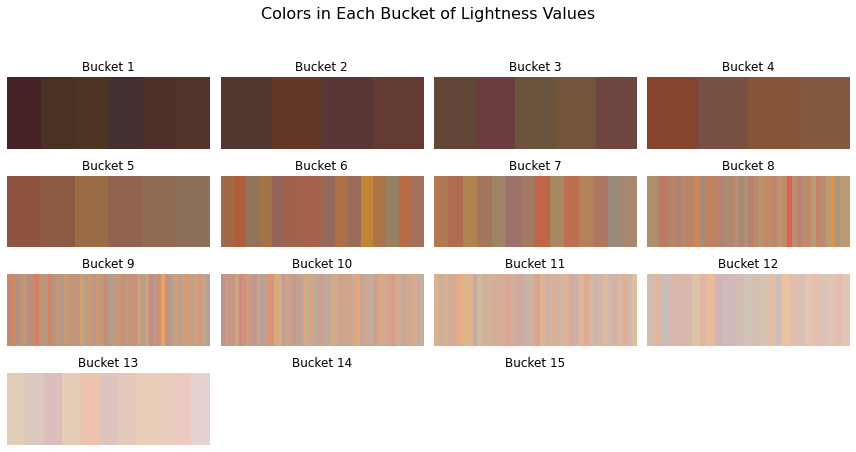

In [139]:
# Group by lightness and get the colors in each bucket
colors_by_bucket = color_values.groupby(pd.cut(color_values['l'], bins=bins))[['b', 'g', 'r']].apply(lambda x: x.values.tolist())

plt.figure(figsize=(12, 8))
for i, (index, colors) in enumerate(colors_by_bucket.iteritems(), start=1):
    plt.subplot(5, 4, i)
    hex_colors = [rgb2hex([color / 255.0 for color in color[::-1]]) for color in colors]  # Reverse BGR to RGB and convert to hex
    plt.imshow([[color[::-1] for color in colors]], aspect='auto')  # Reverse back to BGR for plotting
    plt.axis('off')
    plt.title(f'Bucket {i}')

plt.suptitle('Colors in Each Bucket of Lightness Values', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Resources

https://stackoverflow.com/questions/12182891/plot-image-color-histogram-using-matplotlib?rq=3
https://pudding.cool/2019/04/vogue/
https://www.youtube.com/watch?v=44C_oJiseTQ
https://archive.vogue.com/